In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("G20.csv",low_memory=False)

In [3]:
df.shape

(23147, 1319)

In [4]:
string_columns = df.select_dtypes(include='object').columns

# Create a DataFrame with the list of string columns
string_columns_df = pd.DataFrame({"String Columns": string_columns})

# Save the DataFrame to an Excel file
string_columns_df.to_excel("string_columns_list.xlsx", index=False)

In [5]:
df.head()

,YEAR-MONTH ENGINE BATCH ( YYYYMM),plant Name,Eingine Identfier 1,Eingine Identfier 2,Probability of Not Ok - score,Prediction - Ok or Not Ok,Actual- Ok or Not Ok,model_act,serial_act,limit_plan_act,...,op100_bolt angle_5_assembly,op100_bolt torque_5_assembly,op100_bolt angle_4_assembly,op100_bolt torque_4_assembly,op100_bolt angle_3_assembly,op100_bolt torque_3_assembly,op100_bolt angle_2_assembly,op100_bolt torque_2_assembly,op100_bolt angle_assembly,op100_bolt torque_assembly
0,202206.0,Igatpuri,G20E12345,G20,0.597073,No Test,PASS,ZE,G20E12345,GW601.lmt,...,99.86399,10.99651,51.68716,10.99651,80.01093,10.99651,80.48318,11.00568,119.665500,45.02655
1,202206.0,Igatpuri,G20E12346,G20,0.602441,No Test,PASS,ZE,G20E12346,GW601.lmt,...,86.08873,11.00109,46.46740,11.00109,68.61856,10.99651,64.02071,11.00109,99.089100,45.01738
2,202205.0,Igatpuri,G20E12347,G20,0.654298,No Test,PASS,ZD,G20E12347,GZ101cafe.lmt,...,0.00000,0.00000,0.00000,0.00000,33.60006,45.07239,45.37322,45.03572,6.834419,11.01943
3,202205.0,Igatpuri,G20E12348,G20,0.666948,No Test,PASS,ZD,G20E12348,GZ101cafe.lmt,...,0.00000,0.00000,0.00000,0.00000,24.92484,45.03114,33.96091,45.02197,12.474890,11.00109
4,202205.0,Igatpuri,G20E12349,G20,0.656042,No Test,PASS,ZE,G20E12349,GW601.lmt,...,40.21997,10.99651,0.00000,0.00000,56.16030,11.00109,97.67898,45.02197,8.638638,11.03776


In [6]:
column_names = df.columns
print(column_names)


Index(['YEAR-MONTH ENGINE BATCH ( YYYYMM)', 'plant Name',
       'Eingine Identfier 1', 'Eingine Identfier 2',
       'Probability of  Not Ok -  score ', 'Prediction - Ok or Not Ok',
       'Actual- Ok or Not Ok', 'model_act', 'serial_act', 'limit_plan_act',
       ...
       'op100_bolt angle_5_assembly', 'op100_bolt torque_5_assembly',
       'op100_bolt angle_4_assembly', 'op100_bolt torque_4_assembly',
       'op100_bolt angle_3_assembly', 'op100_bolt torque_3_assembly',
       'op100_bolt angle_2_assembly', 'op100_bolt torque_2_assembly',
       'op100_bolt angle_assembly', 'op100_bolt torque_assembly'],
      dtype='object', length=1319)


In [7]:
if 'param44' in df.columns:
    print("The 'desired_column' is present in the DataFrame.")
else:
    print("The 'desired_column' is not present in the DataFrame.")

The 'desired_column' is not present in the DataFrame.


In [8]:
threshold = 0.2 * len(df)

# Find columns with missing data exceeding the threshold
columns_with_missing_data = df.columns[df.isnull().sum() > threshold]

print("Columns with missing data exceeding 20%:")
print(columns_with_missing_data)

total_columns_with_missing_data = len(columns_with_missing_data)

print(f"Total number of columns with missing data exceeding 20%: {total_columns_with_missing_data}")


Columns with missing data exceeding 20%:
Index(['actual_oil_gallery1_span_act', 'actual_oil_gallery2_span_act',
       'actual_oil_gallery3_span_act', 'actual_oil_gallery4_span_act',
       'torque1_span_act', 'torque2_span_act', 'torque3_span_act',
       'torque4_span_act', 'throttle_position_sensor1_span_act',
       'ignition_span1_act',
       ...
       'roundness_crank_bore_5_mbg',
       'conc_crank_bore_5_wrt_j1_j4_journals_mbg', 'ambient_temperature_mbg',
       'part_temperature_mbg', 'param9_primary_lsl_load',
       'param9_primary_usl_load', 'param33_primary_lsl_load',
       'param33_primary_usl_load', 'param134_primary_lsl_load',
       'param134_primary_usl_load'],
      dtype='object', length=253)
Total number of columns with missing data exceeding 20%: 253


In [9]:
df = df.drop(columns=columns_with_missing_data)

print("DataFrame after removing columns with missing data exceeding 20%:")
print(df)

DataFrame after removing columns with missing data exceeding 20%:
       YEAR-MONTH ENGINE BATCH ( YYYYMM) plant Name Eingine Identfier 1  \
0                               202206.0   Igatpuri           G20E12345   
1                               202206.0   Igatpuri           G20E12346   
2                               202205.0   Igatpuri           G20E12347   
3                               202205.0   Igatpuri           G20E12348   
4                               202205.0   Igatpuri           G20E12349   
...                                  ...        ...                 ...   
23142                                NaN        NaN                 NaN   
23143                                NaN        NaN                 NaN   
23144                                NaN        NaN                 NaN   
23145                                NaN        NaN                 NaN   
23146                                NaN        NaN                 NaN   

      Eingine Identfier 2  Probab

In [10]:
df.shape

(23147, 1066)

In [11]:
string_columns = df.select_dtypes(include=['object'])

print("String columns in the DataFrame:")
print(string_columns)

String columns in the DataFrame:
      plant Name Eingine Identfier 1 Eingine Identfier 2  \
0       Igatpuri           G20E12345                 G20   
1       Igatpuri           G20E12346                 G20   
2       Igatpuri           G20E12347                 G20   
3       Igatpuri           G20E12348                 G20   
4       Igatpuri           G20E12349                 G20   
...          ...                 ...                 ...   
23142        NaN                 NaN                 NaN   
23143        NaN                 NaN                 NaN   
23144        NaN                 NaN                 NaN   
23145        NaN                 NaN                 NaN   
23146        NaN                 NaN                 NaN   

      Prediction - Ok or Not Ok Actual- Ok or Not Ok model_act serial_act  \
0                       No Test                 PASS        ZE  G20E12345   
1                       No Test                 PASS        ZE  G20E12346   
2              

In [12]:
string_columns = df.select_dtypes(include=['object'])

# Check for empty spaces in the selected string columns
for column in string_columns.columns:
    empty_spaces = df[column].str.isspace()
    print(f"Column '{column}':")
    print(empty_spaces)

Column 'plant Name':
0        False
1        False
2        False
3        False
4        False
         ...  
23142      NaN
23143      NaN
23144      NaN
23145      NaN
23146      NaN
Name: plant Name, Length: 23147, dtype: object
Column 'Eingine Identfier 1':
0        False
1        False
2        False
3        False
4        False
         ...  
23142      NaN
23143      NaN
23144      NaN
23145      NaN
23146      NaN
Name: Eingine Identfier 1, Length: 23147, dtype: object
Column 'Eingine Identfier 2':
0        False
1        False
2        False
3        False
4        False
         ...  
23142      NaN
23143      NaN
23144      NaN
23145      NaN
23146      NaN
Name: Eingine Identfier 2, Length: 23147, dtype: object
Column 'Prediction - Ok or Not Ok':
0        False
1        False
2        False
3        False
4        False
         ...  
23142      NaN
23143      NaN
23144      NaN
23145      NaN
23146      NaN
Name: Prediction - Ok or Not Ok, Length: 23147, dtype: object
Co

In [13]:
# Filter and calculate the mean only for numeric columns
numeric_columns = df.select_dtypes(include=[np.number])
column_means = numeric_columns.mean()

# Fill missing values in numeric columns with their respective column means
df[numeric_columns.columns] = numeric_columns.fillna(column_means)

print("DataFrame after replacing empty spaces with the mean of the numeric columns:")
print(df)

DataFrame after replacing empty spaces with the mean of the numeric columns:
       YEAR-MONTH ENGINE BATCH ( YYYYMM) plant Name Eingine Identfier 1  \
0                          202206.000000   Igatpuri           G20E12345   
1                          202206.000000   Igatpuri           G20E12346   
2                          202205.000000   Igatpuri           G20E12347   
3                          202205.000000   Igatpuri           G20E12348   
4                          202205.000000   Igatpuri           G20E12349   
...                                  ...        ...                 ...   
23142                      202163.142622        NaN                 NaN   
23143                      202163.142622        NaN                 NaN   
23144                      202163.142622        NaN                 NaN   
23145                      202163.142622        NaN                 NaN   
23146                      202163.142622        NaN                 NaN   

      Eingine Identfie

# 5.1 Data Consistency

In [14]:
#search for no of zeros in a particular columns
# Define the threshold for the percentage of zeros
threshold = 0.25

# Calculate the number of zeros in each column
zero_counts = (df == 0).sum()

# Calculate the number of rows in the DataFrame
num_rows = len(df)

# Find columns with more than 25% zeros
columns_with_more_than_25_percent_zeros = zero_counts[zero_counts > (threshold * num_rows)].index

print("Columns with more than 25% zeros:")
print(columns_with_more_than_25_percent_zeros)

total_columns_with_more_than_25_percent_zeros = len(columns_with_more_than_25_percent_zeros)

print("Total number of columns with more than 25% zeros:", total_columns_with_more_than_25_percent_zeros)

Columns with more than 25% zeros:
Index(['abort_act', 'crank_min_act', 'e_vgt_min_act', 'blow_by_min_act',
       'param83_secondary_load', 'op023_process value4_assembly',
       'op023_ttt missing tooth value -high rpm_1_assembly',
       'op023_ttt static leak test value_assembly',
       'op26a_bolt angle_8_assembly', 'op26a_bolt torque_8_assembly',
       ...
       'op100_bolt angle_6_assembly', 'op100_bolt torque_6_assembly',
       'op100_bolt angle_5_assembly', 'op100_bolt torque_5_assembly',
       'op100_bolt angle_4_assembly', 'op100_bolt torque_4_assembly',
       'op100_bolt angle_3_assembly', 'op100_bolt torque_3_assembly',
       'op100_bolt angle_2_assembly', 'op100_bolt torque_2_assembly'],
      dtype='object', length=251)
Total number of columns with more than 25% zeros: 251


In [15]:
#remove these columns
df = df.drop(columns=columns_with_more_than_25_percent_zeros)

print("DataFrame after removing columns with more than 25% zeros:")
print(df)

DataFrame after removing columns with more than 25% zeros:
       YEAR-MONTH ENGINE BATCH ( YYYYMM) plant Name Eingine Identfier 1  \
0                          202206.000000   Igatpuri           G20E12345   
1                          202206.000000   Igatpuri           G20E12346   
2                          202205.000000   Igatpuri           G20E12347   
3                          202205.000000   Igatpuri           G20E12348   
4                          202205.000000   Igatpuri           G20E12349   
...                                  ...        ...                 ...   
23142                      202163.142622        NaN                 NaN   
23143                      202163.142622        NaN                 NaN   
23144                      202163.142622        NaN                 NaN   
23145                      202163.142622        NaN                 NaN   
23146                      202163.142622        NaN                 NaN   

      Eingine Identfier 2  Probability o

In [16]:
#after removing columns due to zeros.
df.shape

(23147, 815)

In [17]:
df = df.apply(lambda x: x.replace(0, x.mean()) if pd.api.types.is_numeric_dtype(x) and x.dtype == 'int64' else x)


In [18]:
df

,YEAR-MONTH ENGINE BATCH ( YYYYMM),plant Name,Eingine Identfier 1,Eingine Identfier 2,Probability of Not Ok - score,Prediction - Ok or Not Ok,Actual- Ok or Not Ok,model_act,serial_act,limit_plan_act,...,op097_bolt torque_4_assembly,op097_bolt angle_3_assembly,op097_bolt torque_3_assembly,op097_bolt angle_2_assembly,op097_bolt torque_2_assembly,op097_bolt angle_1_assembly,op097_bolt torque_1_assembly,op099_bolt torque6_assembly,op100_bolt angle_assembly,op100_bolt torque_assembly
0,202206.000000,Igatpuri,G20E12345,G20,0.597073,No Test,PASS,ZE,G20E12345,GW601.lmt,...,0.000000,0.000000,0.000000,51.081250,18.003380,86.692670,18.012940,4.007663,119.665500,45.026550
1,202206.000000,Igatpuri,G20E12346,G20,0.602441,No Test,PASS,ZE,G20E12346,GW601.lmt,...,0.000000,0.000000,0.000000,45.247240,18.006560,70.930530,18.006560,4.005747,99.089100,45.017380
2,202205.000000,Igatpuri,G20E12347,G20,0.654298,No Test,PASS,ZD,G20E12347,GZ101cafe.lmt,...,10.997810,40.400450,11.020130,40.617500,17.997000,52.975160,17.997000,3.994253,6.834419,11.019430
3,202205.000000,Igatpuri,G20E12348,G20,0.666948,No Test,PASS,ZD,G20E12348,GZ101cafe.lmt,...,10.997810,44.933930,11.004190,51.672880,17.997000,95.453300,18.000190,3.994253,12.474890,11.001090
4,202205.000000,Igatpuri,G20E12349,G20,0.656042,No Test,PASS,ZE,G20E12349,GW601.lmt,...,11.001000,40.939560,11.001000,57.114800,18.000190,87.630870,18.003380,3.994253,8.638638,11.037760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23142,202163.142622,NaN,NaN,NaN,0.638657,NaN,NaN,NaN,NaN,NaN,...,9.991125,47.836546,9.915821,43.076893,17.771165,67.749624,17.553357,3.987820,71.769761,36.761997
23143,202163.142622,NaN,NaN,NaN,0.638657,NaN,NaN,NaN,NaN,NaN,...,9.991125,47.836546,9.915821,43.076893,17.771165,67.749624,17.553357,3.987820,71.769761,36.761997
23144,202163.142622,NaN,NaN,NaN,0.638657,NaN,NaN,NaN,NaN,NaN,...,9.991125,47.836546,9.915821,43.076893,17.771165,67.749624,17.553357,3.987820,71.769761,36.761997
23145,202163.142622,NaN,NaN,NaN,0.638657,NaN,NaN,NaN,NaN,NaN,...,9.991125,47.836546,9.915821,43.076893,17.771165,67.749624,17.553357,3.987820,71.769761,36.761997


In [19]:
# to cross check if the int column still contain zeros.
df.select_dtypes(include=['int64']).eq(0).any().any()

False

In [20]:
if 'Actual- Ok or Not Ok' in df.columns:
    print("The 'desired_column' is present in the DataFrame.")
else:
    print("The 'desired_column' is not present in the DataFrame.")

The 'desired_column' is present in the DataFrame.


In [21]:
df = df.drop(['oil_pressure_max_act'], axis=1)
df = df.drop(['oil_pressure_min_act'], axis=1)
df = df.drop(['oil_pressure_span_act'], axis=1)
df = df.drop(['e_vgt_span_act'], axis=1)
df = df.drop(['turbo_acceleration_span_act'], axis=1)
df = df.drop(['intake1_pressure_max_act'], axis=1)
df = df.drop(['intake2_pressure_max_act'], axis=1)
df = df.drop(['intake3_pressure_max_act'], axis=1)
df = df.drop(['intake4_pressure_max_act'], axis=1)
df = df.drop(['intake1_pressure_min_act'], axis=1)
df = df.drop(['intake2_pressure_min_act'], axis=1)
df = df.drop(['intake3_pressure_min_act'], axis=1)
df = df.drop(['intake4_pressure_min_act'], axis=1)
df = df.drop(['intake1_pressure_span_act'], axis=1)
df = df.drop(['intake2_pressure_span_act'], axis=1)
df = df.drop(['intake3_pressure_span_act'], axis=1)
df = df.drop(['intake4_pressure_span_act'], axis=1)
df = df.drop(['vacuum_pump_max_act'], axis=1)
df = df.drop(['vacuum_pump_min_act'], axis=1)
df = df.drop(['vacuum_pump_span_act'], axis=1)
df = df.drop(['exhaust1_pressure_max_act'], axis=1)
df = df.drop(['exhaust2_pressure_max_act'], axis=1)
df = df.drop(['exhaust3_pressure_max_act'], axis=1)
df = df.drop(['exhaust4_pressure_max_act'], axis=1)
df = df.drop(['exhaust1_pressure_min_act'], axis=1)
df = df.drop(['exhaust2_pressure_min_act'], axis=1)
df = df.drop(['exhaust3_pressure_min_act'], axis=1)
df = df.drop(['exhaust4_pressure_min_act'], axis=1)
df = df.drop(['exhaust1_pressure_span_act'], axis=1)
df = df.drop(['exhaust2_pressure_span_act'], axis=1)
df = df.drop(['exhaust3_pressure_span_act'], axis=1)
df = df.drop(['exhaust4_pressure_span_act'], axis=1)
df = df.drop(['blow_by_max_act'], axis=1)
df = df.drop(['blow_by_span_act'], axis=1)
df = df.drop(['actual_oil_gallery1_max_act'], axis=1)
df = df.drop(['actual_oil_gallery2_max_act'], axis=1)
df = df.drop(['actual_oil_gallery3_max_act'], axis=1)
df = df.drop(['actual_oil_gallery4_max_act'], axis=1)
df = df.drop(['actual_oil_gallery1_min_act'], axis=1)
df = df.drop(['actual_oil_gallery2_min_act'], axis=1)
df = df.drop(['actual_oil_gallery3_min_act'], axis=1)
df = df.drop(['actual_oil_gallery4_min_act'], axis=1)
df = df.drop(['torque1_max_act'], axis=1)
df = df.drop(['torque2_max_act'], axis=1)
df = df.drop(['torque3_max_act'], axis=1)
df = df.drop(['torque4_max_act'], axis=1)
df = df.drop(['torque1_min_act'], axis=1)
df = df.drop(['torque2_min_act'], axis=1)
df = df.drop(['torque3_min_act'], axis=1)
df = df.drop(['torque4_min_act'], axis=1)


In [22]:
df.shape

(23147, 765)

In [23]:
df['Actual- Ok or Not Ok'] = df['Actual- Ok or Not Ok'].replace({'PASS': 0, 'FAIL': 1})

# Remove rows with NaN values in the 'Actual' column
df = df.dropna(subset=['Actual- Ok or Not Ok'])

# Convert the 'Actual' column to integers
df['Actual- Ok or Not Ok'] = df['Actual- Ok or Not Ok'].astype(int)

df.shape
#PASS 0 FAIL 1

(23131, 765)

In [24]:
df['fail_act'] = df['fail_act'].replace({'Pass': 0, 'Fail': 1})

# Convert the 'Actual' column to integers
df['fail_act'] = df['fail_act'].astype(int)

df.shape
#PASS 0 FAIL 1

(23131, 765)

In [25]:
string_columns = df.select_dtypes(include='object').columns

# Count the number of string columns
num_string_columns = len(string_columns)

# Display the list of string columns and the number of string columns
print("String Columns:")
print(string_columns)
print("\nNumber of String Columns:", num_string_columns)

String Columns:
Index(['plant Name', 'Eingine Identfier 1', 'Eingine Identfier 2',
       'Prediction - Ok or Not Ok', 'model_act', 'serial_act',
       'limit_plan_act', 'date_time_act', 'stand_act',
       'engine_serial_number_rfid', 'param7_primary_load',
       'param71_primary_load', 'param71_primary_usl_load',
       'param74_primary_load', 'param74_primary_usl_load',
       'param77_primary_load', 'param79_secondary_load',
       'param95_primary_load', 'param145_primary_load',
       'param145_primary_usl_load', 'param148_primary_load',
       'param148_primary_usl_load', 'param151_primary_load',
       'param151_primary_usl_load', 'param154_primary_load',
       'param154_primary_usl_load'],
      dtype='object')

Number of String Columns: 26


In [26]:
unique_values = df['param77_primary_load'].unique()
print(unique_values)

['PASS' 'FAIL' nan]


In [27]:
# Convert 'True' to 0 and 'False' to 1
df['param77_primary_load'] = df['param77_primary_load'].replace({'PASS': 0, 'FAIL': 1})

df = df.dropna(subset=['param77_primary_load'])

# Convert the column to integer type
df['param77_primary_load'] = df['param77_primary_load'].astype(int)

In [28]:
numeric_columns = df.select_dtypes(exclude='object').columns

# Create a new DataFrame with only numeric columns
df = df[numeric_columns]

# Display the updated DataFrame
df.shape

(23129, 740)

In [29]:
# df.to_excel('output.xlsx', index=False)

# 5.1c Feature Engineering

In [30]:
if 'crank_tooth_width_mean' in df.columns:
    print("The 'desired_column' is present in the DataFrame.")
else:
    print("The 'desired_column' is not present in the DataFrame.")

The 'desired_column' is not present in the DataFrame.


In [31]:
selected_columns = ['intake_camshaft_falling_edge_1_act', 'intake_camshaft_falling_edge_2_act', 'intake_camshaft_falling_edge_3_act', 'intake_camshaft_falling_edge_4_act']

# Extract the selected columns
subset_df = df[selected_columns]

# Calculate summary statistics
summary_stats = subset_df.describe()

# Display the summary statistics
print(summary_stats)


       intake_camshaft_falling_edge_1_act  intake_camshaft_falling_edge_2_act  \
count                        23129.000000                        23129.000000   
mean                            29.825891                          209.340504   
std                              1.495293                            1.530733   
min                             25.312000                          204.608993   
25%                             28.827999                          208.300003   
50%                             29.531000                          209.003998   
75%                             30.761999                          210.233993   
max                             50.272999                          229.746002   

       intake_camshaft_falling_edge_3_act  intake_camshaft_falling_edge_4_act  
count                        23129.000000                        23129.000000  
mean                           389.293874                          569.567984  
std                           

In [32]:
# selected_columns = ['intake_camshaft_width_1_act', 'intake_camshaft_width_2_act', 'intake_camshaft_width_3_act']

# # Extract the selected columns
# subset_df = df[selected_columns]

# # Calculate summary statistics
# summary_stats = subset_df.describe()

# # Display the summary statistics
# print(summary_stats)
selected_columns = ['intake_camshaft_width_1_act', 'intake_camshaft_width_2_act']

# Extract the selected columns
subset_df = df[selected_columns]

# Perform aggregation using the mean
aggregated_column = subset_df.mean(axis=1)

# Replace the original columns with the aggregated column
df['intake_camshaft_width_1_2_act'] = aggregated_column

# Drop the original columns if needed
df.drop(columns=selected_columns, inplace=True)



In [33]:
selected_columns = ['intake_camshaft_width_3_act', 'intake_camshaft_width_4_act']

# Extract the selected columns
subset_df = df[selected_columns]

# Perform aggregation using the mean
aggregated_column = subset_df.mean(axis=1)

# Replace the original columns with the aggregated column
df['intake_camshaft_width_3_4_act'] = aggregated_column

# Drop the original columns if needed
df.drop(columns=selected_columns, inplace=True)

In [34]:
common_prefix = 'crank_falling_edge_'
common_suffix = '_act'

# Specify the range of column indices
start_index = 1
end_index = 57

# Generate the list of column names
column_names = [f"{common_prefix}{i}{common_suffix}" for i in range(start_index, end_index + 1)]

# Extract the selected columns
subset_df = df[column_names]

# Display summary statistics
summary_stats = subset_df.describe()

# Print the summary statistics
print(summary_stats)

       crank_falling_edge_1_act  crank_falling_edge_2_act  \
count              23129.000000              23129.000000   
mean                 268.904549                274.875550   
std                    0.086512                  0.088677   
min                  268.592987                274.570007   
25%                  268.945007                274.746002   
50%                  268.945007                274.920990   
75%                  268.945007                274.920990   
max                  274.746002                280.721985   

       crank_falling_edge_3_act  crank_falling_edge_4_act  \
count              23129.000000              23129.000000   
mean                 280.879397                286.900099   
std                    0.080721                  0.080730   
min                  280.545990                286.699005   
25%                  280.898010                286.875000   
50%                  280.898010                286.875000   
75%                  28

In [35]:
df.drop(columns=column_names, inplace=True)

In [36]:
common_prefix = 'crank_tooth_width_'
common_suffix = '_act'

# Specify the range of column indices
start_index = 1
end_index = 58

# Generate the list of column names
column_names = [f"{common_prefix}{i}{common_suffix}" for i in range(start_index, end_index + 1)]

# Extract the selected columns
subset_df = df[column_names]

# # Display summary statistics
# summary_stats = subset_df.describe()

# # Print the summary statistics
# print(summary_stats)

# s
# Perform aggregation using the mean
aggregated_column = subset_df.mean(axis=1)

# Replace the original columns with the aggregated column
df['crank_tooth_width_act'] = aggregated_column

# Drop the original columns if needed
df.drop(columns=column_names, inplace=True)

In [37]:
df.shape

(23129, 624)

In [38]:
selected_columns = ['vib_head_rms_01_act', 'vib_head_rms_02_act','vib_head_rms_03_act','vib_head_rms_04_act']

# Extract the selected columns
subset_df = df[selected_columns]

# summary_stats = subset_df.describe()

# # Display the summary statistics
# print(summary_stats)
# Perform aggregation using the mean
aggregated_column = subset_df.mean(axis=1)

# Replace the original columns with the aggregated column
df['vib_head_rms_mean_act'] = aggregated_column

# Drop the original columns if needed
df.drop(columns=selected_columns, inplace=True)

In [39]:
selected_columns = ['vib_head_peak_01_act', 'vib_head_peak_02_act','vib_head_peak_03_act','vib_head_peak_04_act']

# # Extract the selected columns
# subset_df = df[selected_columns]

# summary_stats = subset_df.describe()

# # Display the summary statistics
# print(summary_stats)
# Perform aggregation using the mean
aggregated_column = subset_df.mean(axis=1)

# Replace the original columns with the aggregated column
df['vib_head_peak_mean_act'] = aggregated_column

# Drop the original columns if needed
df.drop(columns=selected_columns, inplace=True)

In [40]:
selected_columns = ['vib_rh_block_rms_01_act', 'vib_rh_block_rms_02_act','vib_rh_block_rms_03_act','vib_rh_block_rms_04_act']

# Extract the selected columns
# subset_df = df[selected_columns]

# summary_stats = subset_df.describe()

# # Display the summary statistics
# print(summary_stats)
# Perform aggregation using the mean
aggregated_column = subset_df.mean(axis=1)

# Replace the original columns with the aggregated column
df['vib_rh_block_rms_mean_act'] = aggregated_column

# Drop the original columns if needed
df.drop(columns=selected_columns, inplace=True)

In [41]:
selected_columns = ['vib_rh_block_peak_01_act', 'vib_rh_block_peak_02_act','vib_rh_block_peak_03_act','vib_rh_block_peak_04_act']

# Extract the selected columns
# subset_df = df[selected_columns]

# summary_stats = subset_df.describe()

# # Display the summary statistics
# print(summary_stats)
# Perform aggregation using the mean
aggregated_column = subset_df.mean(axis=1)

# Replace the original columns with the aggregated column
df['vib_rh_block_peak_mean_act'] = aggregated_column

# Drop the original columns if needed
df.drop(columns=selected_columns, inplace=True)

In [42]:
selected_columns = ['injector1_current_act', 'injector2_current_act','injector3_current_act','injector4_current_act']

# Extract the selected columns
# subset_df = df[selected_columns]

# summary_stats = subset_df.describe()

# # Display the summary statistics
# print(summary_stats)

aggregated_column = subset_df.mean(axis=1)

# Replace the original columns with the aggregated column
df['injector_mean_current_act'] = aggregated_column

# Drop the original columns if needed
df.drop(columns=selected_columns, inplace=True)

In [43]:
selected_columns = ['exhaust_camshaft_max_act', 'exhaust_camshaft_min_act']

# Extract the selected columns
# subset_df = df[selected_columns]

# summary_stats = subset_df.describe()

# # Display the summary statistics
# print(summary_stats)
df.drop(columns=selected_columns, inplace=True)

In [44]:
common_prefix = 'torque_data_bolt_'
common_suffix = '_p5_g20'

# Specify the range of column indices
start_index = 1
end_index = 12

# Generate the list of column names
column_names = [f"{common_prefix}{i}{common_suffix}" for i in range(start_index, end_index + 1)]

# Extract the selected columns
subset_df = df[column_names]

# Display summary statistics
summary_stats = subset_df.describe()

# Print the summary statistics
print(summary_stats)

# s
# # Perform aggregation using the mean
# aggregated_column = subset_df.mean(axis=1)

# # Replace the original columns with the aggregated column
# df['crank_tooth_width_act'] = aggregated_column

# # Drop the original columns if needed
# df.drop(columns=column_names, inplace=True)

       torque_data_bolt_1_p5_g20  torque_data_bolt_2_p5_g20  \
count               23129.000000               23129.000000   
mean                    9.094917                   9.106539   
std                     3.822586                   3.832185   
min                     0.000000                   0.000000   
25%                     9.094614                   9.106234   
50%                    11.021780                  11.015400   
75%                    11.056930                  11.063320   
max                    25.043410                  25.152030   

       torque_data_bolt_3_p5_g20  torque_data_bolt_4_p5_g20  \
count               23129.000000               23129.000000   
mean                   16.108502                  16.136951   
std                     8.864439                   8.863004   
min                     0.000000                   0.000000   
25%                    11.028170                  10.986640   
50%                    16.108193                  16.1

In [45]:
df.shape

(23129, 607)

In [46]:
selected_columns = ['op0021_conrod bolt _angle_2_assembly', 'op0021_conrod bolt _2_angle_2_assembly','op0021_conrod bolt _3_angle_2_assembly','op0021_conrod bolt _4_angle_2_assembly','op0021_conrod bolt _5_angle_2_assembly','op0021_conrod bolt _6_angle_2_assembly','op0021_conrod bolt _7_angle_2_assembly','op0021_conrod bolt _8_angle_2_assembly']

# Extract the selected columns
# subset_df = df[selected_columns]

# summary_stats = subset_df.describe()

# # Display the summary statistics
# print(summary_stats)

aggregated_column = subset_df.mean(axis=1)

# Replace the original columns with the aggregated column
df['op0021_conrod bolt mean_angle_2_assembly'] = aggregated_column

# Drop the original columns if needed
df.drop(columns=selected_columns, inplace=True)

In [47]:
selected_columns = ['op0021_conrod bolt 8_resultant_assembly', 'op0021_conrod bolt 7_resultant_assembly','op0021_conrod bolt 6_resultant_assembly','op0021_conrod bolt 5_resultant_assembly','op0021_conrod bolt 4_resultant_assembly','op0021_conrod bolt 3_resultant_assembly','op0021_conrod bolt 2_resultant_assembly','op0021_conrod bolt 1_resultant_assembly']

# Extract the selected columns
# subset_df = df[selected_columns]

# summary_stats = subset_df.describe()

# # Display the summary statistics
# print(summary_stats)

aggregated_column = subset_df.mean(axis=1)

# Replace the original columns with the aggregated column
df['op0021_conrod bolt mean_resultant_assembly'] = aggregated_column

# Drop the original columns if needed
df.drop(columns=selected_columns, inplace=True)

In [48]:
selected_columns = ['op0021_conrod bolt 4_tq1_assembly', 'op0021_conrod bolt 5_tq1_assembly','op0021_conrod bolt 6_tq1_assembly','op0021_conrod bolt 7_tq1_assembly','op0021_conrod bolt 8_tq1_assembly']

# # Extract the selected columns
# subset_df = df[selected_columns]

# summary_stats = subset_df.describe()

# # Display the summary statistics
# print(summary_stats)

aggregated_column = subset_df.mean(axis=1)

# Replace the original columns with the aggregated column
df['op0021_conrod bolt mean_tq1_assembly'] = aggregated_column

# Drop the original columns if needed
df.drop(columns=selected_columns, inplace=True)

In [49]:
# selected_columns = ['op0021_conrod bolt 8_tq1_assembly','op0021_conrod bolt 7_tq1_assembly','op0021_conrod bolt 6_tq1_assembly','op0021_conrod bolt 5_tq1_assembly','op0021_conrod bolt 4_tq1_assembly']

# # Extract the selected columns
# # subset_df = df[selected_columns]

# # summary_stats = subset_df.describe()

# # # Display the summary statistics
# # print(summary_stats)

# aggregated_column = subset_df.mean(axis=1)

# # Replace the original columns with the aggregated column
# df['op0021_conrod bolt mean_tq1_assembly'] = aggregated_column

# # Drop the original columns if needed
# df.drop(columns=selected_columns, inplace=True)

In [50]:
selected_columns = ['op0021_mb cap bolt 10_tq1_assembly', 'op0021_mb cap bolt 9_tq1_assembly','op0021_mb cap bolt 8_tq1_assembly','op0021_mb cap bolt 7_tq1_assembly','op0021_mb cap bolt 6_tq1_assembly','op0021_mb cap bolt 5_tq1_assembly','op0021_mb cap bolt 4_tq1_assembly']

# # Extract the selected columns
# subset_df = df[selected_columns]

# summary_stats = subset_df.describe()

# # Display the summary statistics
# print(summary_stats)

aggregated_column = subset_df.mean(axis=1)

# Replace the original columns with the aggregated column
df['op0021_mb cap bolt mean_tq1_assembly'] = aggregated_column

# Drop the original columns if needed
df.drop(columns=selected_columns, inplace=True)

In [51]:
selected_columns = ['op0021_mb cap bolt 10_resultant_assembly', 'op0021_mb cap bolt 9_resultant_assembly','op0021_mb cap bolt 8_resultant_assembly','op0021_mb cap bolt 7_resultant_assembly','op0021_mb cap bolt 6_resultant_assembly','op0021_mb cap bolt 5_resultant_assembly','op0021_mb cap bolt 4_resultant_assembly','op0021_mb cap bolt 3_resultant_assembly','op0021_mb cap bolt 2_resultant_assembly','op0021_mb cap bolt 1_resultant_assembly']

# # Extract the selected columns
# subset_df = df[selected_columns]

# summary_stats = subset_df.describe()

# # Display the summary statistics
# print(summary_stats)

aggregated_column = subset_df.mean(axis=1)

# Replace the original columns with the aggregated column
df['op0021_mb cap bolt mean_resultant_assembly'] = aggregated_column

# Drop the original columns if needed
df.drop(columns=selected_columns, inplace=True)

In [52]:
selected_columns = ['op0021_mb cap bolt _9_angle_2_assembly','op0021_mb cap bolt _8_angle_2_assembly','op0021_mb cap bolt _7_angle_2_assembly','op0021_mb cap bolt _6_angle_2_assembly','op0021_mb cap bolt _5_angle_2_assembly','op0021_mb cap bolt _4_angle_2_assembly','op0021_mb cap bolt _3_angle_2_assembly','op0021_mb cap bolt _2_angle_2_assembly','op0021_mb cap bolt _angle_2_assembly', ]

# # Extract the selected columns
# subset_df = df[selected_columns]

# summary_stats = subset_df.describe()

# # Display the summary statistics
# print(summary_stats)

aggregated_column = subset_df.mean(axis=1)

# Replace the original columns with the aggregated column
df['op0021_mb cap bolt _mean_angle_2_assembly'] = aggregated_column

# Drop the original columns if needed
df.drop(columns=selected_columns, inplace=True)

In [53]:
selected_columns = ['op026_bolt angle5_assembly','op026_bolt angle4_assembly','op026_bolt angle3_assembly','op026_bolt angle2_assembly','op026_bolt angle1_assembly','op026_bolt angle0_assembly' ]

# # Extract the selected columns
# subset_df = df[selected_columns]

# summary_stats = subset_df.describe()

# # Display the summary statistics
# print(summary_stats)

aggregated_column = subset_df.mean(axis=1)

# Replace the original columns with the aggregated column
df['op026_bolt angle5_assembly'] = aggregated_column

# Drop the original columns if needed
df.drop(columns=selected_columns, inplace=True)

In [54]:
selected_columns = ['op026_bolt torque5_assembly','op026_bolt torque4_assembly','op026_bolt torque3_assembly','op026_bolt torque2_assembly','op026_bolt torque1_assembly','op026_bolt torque0_assembly' ]

# Extract the selected columns
subset_df = df[selected_columns]

summary_stats = subset_df.describe()

# Display the summary statistics
print(summary_stats)

# aggregated_column = subset_df.mean(axis=1)

# # Replace the original columns with the aggregated column
# df['injector_mean_current_act'] = aggregated_column

# # Drop the original columns if needed
df.drop(columns=selected_columns, inplace=True)

       op026_bolt torque5_assembly  op026_bolt torque4_assembly  \
count                 23129.000000                 23129.000000   
mean                     25.019858                    25.036833   
std                       0.012617                     0.031844   
min                      25.000000                    25.000000   
25%                      25.010000                    25.020000   
50%                      25.020000                    25.030000   
75%                      25.020000                    25.050000   
max                      25.080000                    25.250000   

       op026_bolt torque3_assembly  op026_bolt torque2_assembly  \
count                 23129.000000                 23129.000000   
mean                     25.027981                    25.016251   
std                       0.026619                     0.014612   
min                      25.000000                    25.000000   
25%                      25.010000                    25.0000

In [55]:
selected_columns = ['op026_bolt angle_9_assembly','op026_bolt angle_8_assembly','op026_bolt angle_7_assembly','op026_bolt angle_6_assembly','op026_bolt angle_5_assembly','op026_bolt angle_4_assembly','op026_bolt angle_3_assembly','op026_bolt angle_2_assembly','op026_bolt angle_assembly' ]

# Extract the selected columns
subset_df = df[selected_columns]

summary_stats = subset_df.describe()

# Display the summary statistics
print(summary_stats)

aggregated_column = subset_df.mean(axis=1)

# Replace the original columns with the aggregated column
df['op026_bolt angle_mean_assembly'] = aggregated_column

# Drop the original columns if needed
df.drop(columns=selected_columns, inplace=True)

       op026_bolt angle_9_assembly  op026_bolt angle_8_assembly  \
count                 23129.000000                 23129.000000   
mean                     30.848792                    29.690683   
std                       3.119434                     2.805437   
min                      22.100000                    18.700000   
25%                      28.900000                    27.700000   
50%                      30.600000                    29.600000   
75%                      32.400000                    31.400000   
max                      81.900000                    68.200000   

       op026_bolt angle_7_assembly  op026_bolt angle_6_assembly  \
count                 23129.000000                 23129.000000   
mean                     28.444537                    29.831004   
std                       2.729599                     2.959671   
min                      17.300000                    17.100000   
25%                      26.400000                    27.8000

In [56]:
selected_columns = ['op026_bolt torque_9_assembly','op026_bolt torque_8_assembly','op026_bolt torque_7_assembly','op026_bolt torque_6_assembly','op026_bolt torque_5_assembly','op026_bolt torque_4_assembly','op026_bolt torque_3_assembly','op026_bolt torque_2_assembly','op026_bolt torque_assembly' ]

# Extract the selected columns
subset_df = df[selected_columns]

summary_stats = subset_df.describe()

# Display the summary statistics
print(summary_stats)

aggregated_column = subset_df.mean(axis=1)

# Replace the original columns with the aggregated column
df['op026_bolt torque_mean_assembly'] = aggregated_column

# Drop the original columns if needed
df.drop(columns=selected_columns, inplace=True)

       op026_bolt torque_9_assembly  op026_bolt torque_8_assembly  \
count                  23129.000000                  23129.000000   
mean                      25.045082                     25.010199   
std                        0.033976                      0.011853   
min                       25.000000                     25.000000   
25%                       25.020000                     25.000000   
50%                       25.040000                     25.010000   
75%                       25.070000                     25.010000   
max                       25.280000                     25.070000   

       op026_bolt torque_7_assembly  op026_bolt torque_6_assembly  \
count                  23129.000000                  23129.000000   
mean                      25.018003                     25.019090   
std                        0.017776                      0.013109   
min                       25.000000                     25.000000   
25%                       25.0000

In [57]:
common_prefix = 'op0033_cylinder head bolt angle_'
common_suffix = '_assembly'

selected_columns = [col for col in df.columns if col.startswith(common_prefix) and col.endswith(common_suffix)]
# Extract the selected columns
subset_df = df[selected_columns]

summary_stats = subset_df.describe()

# Display the summary statistics
print(summary_stats)

aggregated_column = subset_df.mean(axis=1)

# Replace the original columns with the aggregated column
df['op0033_cylinder head bolt angle_mean_assembly'] = aggregated_column

# Drop the original columns if needed
df.drop(columns=selected_columns, inplace=True)

       op0033_cylinder head bolt angle_36_assembly  \
count                                 23129.000000   
mean                                     93.824571   
std                                      11.340278   
min                                       0.000000   
25%                                      95.200000   
50%                                      95.200000   
75%                                      95.200000   
max                                      95.300000   

       op0033_cylinder head bolt angle_35_assembly  \
count                                 23129.000000   
mean                                     95.179973   
std                                       2.077359   
min                                       0.000000   
25%                                      95.200000   
50%                                      95.200000   
75%                                      95.300000   
max                                      95.400000   

       op0033_cylinder hea

In [58]:
common_prefix = 'op0033_cylinder head bolt '
common_suffix = ' resultant_assembly'

selected_columns = [col for col in df.columns if col.startswith(common_prefix) and col.endswith(common_suffix)]
# Extract the selected columns
subset_df = df[selected_columns]

summary_stats = subset_df.describe()

# Display the summary statistics
print(summary_stats)

aggregated_column = subset_df.mean(axis=1)

# Replace the original columns with the aggregated column
df['op0033_cylinder head bolt_mean_resultant_assembly'] = aggregated_column

# Drop the original columns if needed
df.drop(columns=selected_columns, inplace=True)

       op0033_cylinder head bolt 10 resultant_assembly  \
count                                     23129.000000   
mean                                        110.665815   
std                                          16.794601   
min                                           0.000000   
25%                                         104.710000   
50%                                         111.100000   
75%                                         117.930000   
max                                         179.390000   

       op0033_cylinder head bolt 9 resultant_assembly  \
count                                    23129.000000   
mean                                       109.707808   
std                                         16.799382   
min                                          0.000000   
25%                                        103.660000   
50%                                        109.830000   
75%                                        116.970000   
max                  

In [59]:
common_prefix = 'op040_bolt angle_'
common_suffix = '_assembly'

selected_columns = [col for col in df.columns if col.startswith(common_prefix) and col.endswith(common_suffix)]
# Extract the selected columns
subset_df = df[selected_columns]

summary_stats = subset_df.describe()

# Display the summary statistics
print(summary_stats)

aggregated_column = subset_df.mean(axis=1)

# Replace the original columns with the aggregated column
df['op040_bolt angle__mean_assembly'] = aggregated_column

# Drop the original columns if needed
df.drop(columns=selected_columns, inplace=True)

       op040_bolt angle_24_assembly  op040_bolt angle_23_assembly  \
count                  23129.000000                  23129.000000   
mean                      14.229474                     14.302153   
std                        3.264870                      4.096486   
min                        0.000000                      0.000000   
25%                       12.400000                     12.500000   
50%                       13.300000                     13.300000   
75%                       14.600000                     14.500000   
max                       78.500000                    388.000000   

       op040_bolt angle_22_assembly  op040_bolt angle_21_assembly  \
count                  23129.000000                  23129.000000   
mean                      14.532185                     14.473155   
std                        1.506361                      1.634567   
min                        0.000000                      0.000000   
25%                       13.6000

In [60]:
common_prefix = 'op040_bolt torque_'
common_suffix = '_assembly'

selected_columns = [col for col in df.columns if col.startswith(common_prefix) and col.endswith(common_suffix)]
# Extract the selected columns
subset_df = df[selected_columns]

summary_stats = subset_df.describe()

# Display the summary statistics
print(summary_stats)

aggregated_column = subset_df.mean(axis=1)

# Replace the original columns with the aggregated column
df['op040_bolt torque_mean_assembly'] = aggregated_column

# Drop the original columns if needed
df.drop(columns=selected_columns, inplace=True)

       op040_bolt torque_24_assembly  op040_bolt torque_23_assembly  \
count                   23129.000000                   23129.000000   
mean                       11.010889                      11.015069   
std                         0.348259                       0.348361   
min                         0.000000                       0.000000   
25%                        11.000000                      11.010000   
50%                        11.020000                      11.020000   
75%                        11.030000                      11.040000   
max                        11.350000                      11.230000   

       op040_bolt torque_22_assembly  op040_bolt torque_21_assembly  \
count                   23129.000000                   23129.000000   
mean                       10.991672                      10.995212   
std                         0.402765                       0.402979   
min                         0.000000                       0.000000   
25%  

In [61]:
common_prefix = 'op040_bolt torque'
common_suffix = '_assembly'

selected_columns = [col for col in df.columns if col.startswith(common_prefix) and col.endswith(common_suffix)]
# Extract the selected columns
subset_df = df[selected_columns]

summary_stats = subset_df.describe()

# Display the summary statistics
print(summary_stats)

aggregated_column = subset_df.mean(axis=1)

# Replace the original columns with the aggregated column
df['op040_bolt torque_mean_assembly'] = aggregated_column

# Drop the original columns if needed
df.drop(columns=selected_columns, inplace=True)

       op040_bolt torque9_assembly  op040_bolt torque8_assembly  \
count                 23129.000000                 23129.000000   
mean                     10.998333                    10.992878   
std                       0.403146                     0.402813   
min                       0.000000                     0.000000   
25%                      11.000000                    11.000000   
50%                      11.010000                    11.010000   
75%                      11.020000                    11.010000   
max                      11.090000                    11.050000   

       op040_bolt torque7_assembly  op040_bolt torque6_assembly  \
count                 23129.000000                 23129.000000   
mean                     10.995903                    10.993756   
std                       0.402988                     0.402854   
min                       0.000000                     0.000000   
25%                      11.000000                    11.0000

In [62]:
common_prefix = 'op042_bolt angle_'
common_suffix = '_assembly'

selected_columns = [col for col in df.columns if col.startswith(common_prefix) and col.endswith(common_suffix)]
# Extract the selected columns
subset_df = df[selected_columns]

summary_stats = subset_df.describe()

# Display the summary statistics
print(summary_stats)

aggregated_column = subset_df.mean(axis=1)

# Replace the original columns with the aggregated column
df['op042_bolt angle__mean_assembly'] = aggregated_column

# Drop the original columns if needed
df.drop(columns=selected_columns, inplace=True)

       op042_bolt angle_5_assembly  op042_bolt angle_4_assembly  \
count                 23129.000000                 23129.000000   
mean                     14.553003                    14.905388   
std                       6.204636                     6.420663   
min                       0.000000                     0.000000   
25%                      11.093890                    11.067630   
50%                      13.600430                    13.607430   
75%                      17.132690                    16.994410   
max                      66.503820                    50.612150   

       op042_bolt angle_3_assembly  op042_bolt angle_2_assembly  \
count                 23129.000000                 23129.000000   
mean                     15.097744                    15.948875   
std                       6.353595                     4.047588   
min                       0.000000                     0.000000   
25%                      11.216420                    14.0047

In [63]:
common_prefix = 'op042_bolt torque_'
common_suffix = '_assembly'

selected_columns = [col for col in df.columns if col.startswith(common_prefix) and col.endswith(common_suffix)]
# Extract the selected columns
subset_df = df[selected_columns]

summary_stats = subset_df.describe()

# Display the summary statistics
print(summary_stats)

aggregated_column = subset_df.mean(axis=1)

# Replace the original columns with the aggregated column
df['op042_bolt torque_mean_assembly'] = aggregated_column

# Drop the original columns if needed
df.drop(columns=selected_columns, inplace=True)

       op042_bolt torque_5_assembly  op042_bolt torque_4_assembly  \
count                  23129.000000                  23129.000000   
mean                      24.083707                     24.828108   
std                        4.738678                      1.898619   
min                        0.000000                      0.000000   
25%                       25.005560                     25.005560   
50%                       25.011920                     25.015090   
75%                       25.024620                     25.024620   
max                       25.113530                     25.856550   

       op042_bolt torque_3_assembly  op042_bolt torque_2_assembly  \
count                  23129.000000                  23129.000000   
mean                      24.829262                     11.120263   
std                        1.852459                      1.410622   
min                        0.000000                      0.000000   
25%                       25.0055

In [64]:
common_prefix = 'op043_bolt angle_'
common_suffix = '_assembly'

selected_columns = [col for col in df.columns if col.startswith(common_prefix) and col.endswith(common_suffix)]
# Extract the selected columns
subset_df = df[selected_columns]

summary_stats = subset_df.describe()

# Display the summary statistics
print(summary_stats)

# aggregated_column = subset_df.mean(axis=1)

# # Replace the original columns with the aggregated column
# df['injector_mean_current_act'] = aggregated_column

# # Drop the original columns if needed
# df.drop(columns=selected_columns, inplace=True)

       op043_bolt angle_8_assembly  op043_bolt angle_7_assembly  \
count                 23129.000000                 23129.000000   
mean                     37.197986                    36.243759   
std                       8.266527                     5.477942   
min                       0.000000                     0.000000   
25%                      34.039580                    33.237910   
50%                      37.274280                    36.348330   
75%                      40.510720                    39.390480   
max                     837.319000                   141.836500   

       op043_bolt angle_6_assembly  op043_bolt angle_2_assembly  \
count                 23129.000000                 23129.000000   
mean                     20.409612                    33.733389   
std                      17.892427                     1.697317   
min                       0.000000                     0.000000   
25%                      14.367090                    33.8378

In [65]:
common_prefix = 'op043_bolt torque_'
common_suffix = '_assembly'

selected_columns = [col for col in df.columns if col.startswith(common_prefix) and col.endswith(common_suffix)]
# Extract the selected columns
subset_df = df[selected_columns]

summary_stats = subset_df.describe()

# Display the summary statistics
print(summary_stats)

# aggregated_column = subset_df.mean(axis=1)

# # Replace the original columns with the aggregated column
# df['injector_mean_current_act'] = aggregated_column

# # Drop the original columns if needed
# df.drop(columns=selected_columns, inplace=True)

       op043_bolt torque_8_assembly  op043_bolt torque_7_assembly  \
count                  23129.000000                  23129.000000   
mean                      10.917913                     10.971005   
std                        0.969799                      0.557759   
min                        0.000000                      0.000000   
25%                       10.997510                     11.000570   
50%                       11.003640                     11.003640   
75%                       11.006700                     11.006700   
max                       11.978610                     11.773190   

       op043_bolt torque_6_assembly  op043_bolt torque_2_assembly  \
count                  23129.000000                  23129.000000   
mean                      24.816691                    154.871300   
std                        1.891986                     11.666347   
min                        0.000000                      0.000000   
25%                       25.0026

In [66]:
common_prefix = 'op047_bolt angle'
common_suffix = '_assembly'

selected_columns = [col for col in df.columns if col.startswith(common_prefix) and col.endswith(common_suffix)]
# Extract the selected columns
subset_df = df[selected_columns]

summary_stats = subset_df.describe()

# Display the summary statistics
print(summary_stats)

aggregated_column = subset_df.mean(axis=1)

# Replace the original columns with the aggregated column
df['op047_bolt angle_mean_assembly'] = aggregated_column

# Drop the original columns if needed
df.drop(columns=selected_columns, inplace=True)

       op047_bolt angle7_assembly  op047_bolt angle6_assembly  \
count                23129.000000                23129.000000   
mean                    24.631095                   38.106779   
std                      5.697741                   12.522422   
min                      0.000000                    0.000000   
25%                     21.600000                   27.600000   
50%                     24.500000                   35.500000   
75%                     27.500000                   46.200000   
max                    397.600000                   99.600000   

       op047_bolt angle5_assembly  op047_bolt angle4_assembly  \
count                23129.000000                23129.000000   
mean                    40.270077                   34.143050   
std                      6.031496                    9.755642   
min                      0.000000                    0.000000   
25%                     35.700000                   26.700000   
50%                     

In [67]:
common_prefix = 'op047_bolt torque'
common_suffix = '_assembly'

selected_columns = [col for col in df.columns if col.startswith(common_prefix) and col.endswith(common_suffix)]
# Extract the selected columns
subset_df = df[selected_columns]

summary_stats = subset_df.describe()

# Display the summary statistics
print(summary_stats)

aggregated_column = subset_df.mean(axis=1)

# Replace the original columns with the aggregated column
df['op047_bolt torque_mean_assembly'] = aggregated_column

# Drop the original columns if needed
df.drop(columns=selected_columns, inplace=True)

       op047_bolt torque7_assembly  op047_bolt torque6_assembly  \
count                 23129.000000                 23129.000000   
mean                     25.074177                    35.182116   
std                       0.778284                     0.578954   
min                       0.000000                     0.000000   
25%                      25.040000                    35.100000   
50%                      25.070000                    35.170000   
75%                      25.130000                    35.260000   
max                      26.950000                    35.880000   

       op047_bolt torque5_assembly  op047_bolt torque4_assembly  \
count                 23129.000000                 23129.000000   
mean                     35.104929                    35.149201   
std                       0.572956                     0.578254   
min                       0.000000                     0.000000   
25%                      35.050000                    35.0700

In [68]:
common_prefix = 'op056_bolt angle'
common_suffix = '_assembly'

selected_columns = [col for col in df.columns if col.startswith(common_prefix) and col.endswith(common_suffix)]
# Extract the selected columns
subset_df = df[selected_columns]

summary_stats = subset_df.describe()

# Display the summary statistics
print(summary_stats)

# aggregated_column = subset_df.mean(axis=1)

# # Replace the original columns with the aggregated column
# df['injector_mean_current_act'] = aggregated_column

# # Drop the original columns if needed
# df.drop(columns=selected_columns, inplace=True)

       op056_bolt angle_assembly  op056_bolt angle9_assembly  \
count               23129.000000                23129.000000   
mean                   27.525479                   63.998854   
std                     5.002929                   10.717285   
min                     0.000000                    0.000000   
25%                    23.800000                   56.600000   
50%                    26.400000                   63.900000   
75%                    30.800000                   71.400000   
max                    87.000000                   99.500000   

       op056_bolt angle8_assembly  op056_bolt angle7_assembly  \
count                23129.000000                23129.000000   
mean                    64.792585                   63.634204   
std                     10.524680                   10.477498   
min                      0.000000                    0.000000   
25%                     57.600000                   56.300000   
50%                     64.800000

In [69]:
df.shape

(23129, 436)

In [70]:
common_prefix = 'op056_bolt torque'
common_suffix = '_assembly'

selected_columns = [col for col in df.columns if col.startswith(common_prefix) and col.endswith(common_suffix)]
# Extract the selected columns
subset_df = df[selected_columns]

summary_stats = subset_df.describe()

# Display the summary statistics
print(summary_stats)

# aggregated_column = subset_df.mean(axis=1)

# # Replace the original columns with the aggregated column
# df['injector_mean_current_act'] = aggregated_column

# # Drop the original columns if needed
# df.drop(columns=selected_columns, inplace=True)

       op056_bolt torque_assembly  op056_bolt torque9_assembly  \
count                23129.000000                 23129.000000   
mean                    22.511906                    11.009525   
std                      0.362865                     0.191753   
min                      0.000000                     0.000000   
25%                     22.510000                    11.010000   
50%                     22.510000                    11.010000   
75%                     22.530000                    11.010000   
max                     22.570000                    11.150000   

       op056_bolt torque8_assembly  op056_bolt torque7_assembly  \
count                 23129.000000                 23129.000000   
mean                     11.003581                    11.003092   
std                       0.191671                     0.191816   
min                       0.000000                     0.000000   
25%                      11.000000                    11.000000   
50%

In [71]:
common_prefix = 'op063b_process value'
common_suffix = '_assembly'

selected_columns = [col for col in df.columns if col.startswith(common_prefix) and col.endswith(common_suffix)]
# Extract the selected columns
subset_df = df[selected_columns]

summary_stats = subset_df.describe()

# Display the summary statistics
print(summary_stats)

# aggregated_column = subset_df.mean(axis=1)

# # Replace the original columns with the aggregated column
# df['injector_mean_current_act'] = aggregated_column

# # Drop the original columns if needed
df.drop(columns=selected_columns, inplace=True)

       op063b_process value_4_assembly  op063b_process value_3_assembly  \
count                     23129.000000                     23129.000000   
mean                          0.953438                         0.943433   
std                           0.034191                         0.034516   
min                           0.000000                         0.520000   
25%                           0.933000                         0.923000   
50%                           0.957000                         0.947000   
75%                           0.977000                         0.967000   
max                           1.160000                         1.180000   

       op063b_process value_2_assembly  op063b_process value_assembly  
count                     23129.000000                   23129.000000  
mean                          0.939342                       0.975278  
std                           0.034396                       0.036187  
min                           0.4500

In [72]:
common_prefix = 'op065_bolt torque'
common_suffix = '_assembly'

selected_columns = [col for col in df.columns if col.startswith(common_prefix) and col.endswith(common_suffix)]
# Extract the selected columns
subset_df = df[selected_columns]

summary_stats = subset_df.describe()

# Display the summary statistics
print(summary_stats)

aggregated_column = subset_df.mean(axis=1)

# Replace the original columns with the aggregated column
df['op065_bolt torque_mean_assembly'] = aggregated_column

# Drop the original columns if needed
df.drop(columns=selected_columns, inplace=True)

       op065_bolt torque_4_assembly  op065_bolt torque_3_assembly  \
count                  23129.000000                  23129.000000   
mean                      24.523564                     24.914503   
std                        3.462369                      1.557270   
min                        0.000000                      0.000000   
25%                       25.003070                     25.003070   
50%                       25.009370                     25.009370   
75%                       25.018820                     25.018820   
max                       25.843750                     25.988590   

       op065_bolt torque_2_assembly  op065_bolt torque_1_assembly  
count                  23129.000000                  23129.000000  
mean                      24.923465                     24.932909  
std                        1.486729                      1.412649  
min                        0.000000                      0.000000  
25%                       25.003070   

In [73]:
common_prefix = 'op072_bolt torque'
common_suffix = '_assembly'

selected_columns = [col for col in df.columns if col.startswith(common_prefix) and col.endswith(common_suffix)]
# Extract the selected columns
subset_df = df[selected_columns]

summary_stats = subset_df.describe()

# Display the summary statistics
print(summary_stats)

aggregated_column = subset_df.mean(axis=1)

# Replace the original columns with the aggregated column
df['op072_bolt torque_mean_assembly'] = aggregated_column

# Drop the original columns if needed
df.drop(columns=selected_columns, inplace=True)

       op072_bolt torque_2_assembly  op072_bolt torque_1_assembly
count                  23129.000000                  23129.000000
mean                      22.495934                     22.054228
std                        1.119313                      3.267881
min                        0.000000                      0.000000
25%                       22.514990                     22.514470
50%                       22.538550                     22.536220
75%                       22.571660                     22.568650
max                       23.364340                     23.700540


In [74]:
common_prefix = 'op074_bolt torque'
common_suffix = '_assembly'

selected_columns = [col for col in df.columns if col.startswith(common_prefix) and col.endswith(common_suffix)]
# Extract the selected columns
subset_df = df[selected_columns]

summary_stats = subset_df.describe()

# Display the summary statistics
print(summary_stats)

aggregated_column = subset_df.mean(axis=1)

# Replace the original columns with the aggregated column
df['op074_bolt torque_mean_assembly'] = aggregated_column

# Drop the original columns if needed
df.drop(columns=selected_columns, inplace=True)

       op074_bolt torque_7_assembly  op074_bolt torque_6_assembly  \
count                  23129.000000                  23129.000000   
mean                      21.371219                     22.707126   
std                        8.324305                      7.110513   
min                        0.000000                      0.000000   
25%                       24.999960                     24.999960   
50%                       25.006280                     25.006280   
75%                       25.012600                     25.012600   
max                       25.363510                     25.527900   

       op074_bolt torque_5_assembly  op074_bolt torque_4_assembly  \
count                  23129.000000                  23129.000000   
mean                      18.431203                     22.722559   
std                       10.743932                      7.158068   
min                        0.000000                      0.000000   
25%                        7.1446

In [75]:
common_prefix = 'op074_bolt angle'
common_suffix = '_assembly'

selected_columns = [col for col in df.columns if col.startswith(common_prefix) and col.endswith(common_suffix)]
# Extract the selected columns
subset_df = df[selected_columns]

summary_stats = subset_df.describe()

# Display the summary statistics
print(summary_stats)

aggregated_column = subset_df.mean(axis=1)

# Replace the original columns with the aggregated column
df['op074_bolt angle_mean_assembly'] = aggregated_column

# Drop the original columns if needed
df.drop(columns=selected_columns, inplace=True)

       op074_bolt angle_7_assembly  op074_bolt angle_6_assembly  \
count                 23129.000000                 23129.000000   
mean                     68.700580                    99.470890   
std                      31.889661                    47.406225   
min                       0.000000                     0.000000   
25%                      61.252690                    72.714160   
50%                      78.087810                    95.273020   
75%                      89.419750                   143.644700   
max                     164.505700                   169.956300   

       op074_bolt angle_4_assembly  op074_bolt angle_3_assembly  \
count                 23129.000000                 23129.000000   
mean                     58.366264                    64.986470   
std                      22.411720                    23.309108   
min                       0.000000                     0.000000   
25%                      53.992130                    56.2693

In [76]:
common_prefix = 'op075_bolt angle'
common_suffix = '_assembly'

selected_columns = [col for col in df.columns if col.startswith(common_prefix) and col.endswith(common_suffix)]
# Extract the selected columns
subset_df = df[selected_columns]

summary_stats = subset_df.describe()

# Display the summary statistics
print(summary_stats)

# aggregated_column = subset_df.mean(axis=1)

# # Replace the original columns with the aggregated column
# df['injector_mean_current_act'] = aggregated_column

# # Drop the original columns if needed
# df.drop(columns=selected_columns, inplace=True)

       op075_bolt angle_9_assembly  op075_bolt angle_8_assembly  \
count                 23129.000000                 23129.000000   
mean                     10.487027                    14.594701   
std                      10.573945                     5.478072   
min                       0.000000                     0.000000   
25%                       5.168863                    11.534980   
50%                       7.551126                    13.831480   
75%                      13.092820                    16.990910   
max                      57.776440                    60.412510   

       op075_bolt angle_7_assembly  op075_bolt angle_6_assembly  \
count                 23129.000000                 23129.000000   
mean                     13.458174                    15.906764   
std                       4.620245                     5.025365   
min                       0.000000                     0.000000   
25%                      11.226920                    13.7352

In [77]:
common_prefix = 'op087_bolt angle'
common_suffix = '_assembly'

selected_columns = [col for col in df.columns if col.startswith(common_prefix) and col.endswith(common_suffix)]
# Extract the selected columns
subset_df = df[selected_columns]

summary_stats = subset_df.describe()

# Display the summary statistics
print(summary_stats)

aggregated_column = subset_df.mean(axis=1)

# Replace the original columns with the aggregated column
df['op087_bolt angle_mean_assembly'] = aggregated_column

# Drop the original columns if needed
df.drop(columns=selected_columns, inplace=True)

       op087_bolt angle_6_assembly  op087_bolt angle_5_assembly  \
count                 23129.000000                 23129.000000   
mean                     44.749764                    44.701336   
std                       3.429098                     3.731093   
min                       0.000000                     0.000000   
25%                      45.000000                    45.000000   
50%                      45.000000                    45.000000   
75%                      45.000000                    45.000000   
max                      45.200000                    45.100000   

       op087_bolt angle_4_assembly  op087_bolt angle_3_assembly  \
count                 23129.000000                 23129.000000   
mean                     44.717303                    44.418302   
std                       3.625214                     5.134922   
min                       0.000000                     0.000000   
25%                      45.000000                    45.0000

In [78]:
common_prefix = 'op087_bolt torque'
common_suffix = '_assembly'

selected_columns = [col for col in df.columns if col.startswith(common_prefix) and col.endswith(common_suffix)]
# Extract the selected columns
subset_df = df[selected_columns]

summary_stats = subset_df.describe()

# Display the summary statistics
print(summary_stats)

aggregated_column = subset_df.mean(axis=1)

# Replace the original columns with the aggregated column
df['op087_bolt torque_mean_assembly'] = aggregated_column

# Drop the original columns if needed
df.drop(columns=selected_columns, inplace=True)

       op087_bolt torque_6_assembly  op087_bolt torque_5_assembly  \
count                  23129.000000                  23129.000000   
mean                      60.081307                     59.987941   
std                        8.314855                      8.532219   
min                        0.000000                      0.000000   
25%                       50.840000                     50.840000   
50%                       65.070000                     65.070000   
75%                       65.300000                     65.300000   
max                       70.680000                     69.340000   

       op087_bolt torque_4_assembly  op087_bolt torque_3_assembly  \
count                  23129.000000                  23129.000000   
mean                      60.044129                     59.647302   
std                        8.441701                      9.748924   
min                        0.000000                      0.000000   
25%                       50.9400

In [79]:
common_prefix = 'op087_bolt resultant torque'
common_suffix = '_assembly'

selected_columns = [col for col in df.columns if col.startswith(common_prefix) and col.endswith(common_suffix)]
# Extract the selected columns
subset_df = df[selected_columns]

summary_stats = subset_df.describe()

# Display the summary statistics
print(summary_stats)

aggregated_column = subset_df.mean(axis=1)

# Replace the original columns with the aggregated column
df['op087_bolt resultant torque_mean_assembly'] = aggregated_column

# Drop the original columns if needed
df.drop(columns=selected_columns, inplace=True)

       op087_bolt resultant torque_6_assembly  \
count                            23129.000000   
mean                               155.939204   
std                                 18.789314   
min                                  0.000000   
25%                                146.670000   
50%                                154.960000   
75%                                164.480000   
max                                239.560000   

       op087_bolt resultant torque_5_assembly  \
count                            23129.000000   
mean                               156.835393   
std                                 19.009417   
min                                  0.000000   
25%                                148.110000   
50%                                156.240000   
75%                                165.550000   
max                                224.840000   

       op087_bolt resultant torque_4_assembly  \
count                            23129.000000   
mean              

In [80]:
common_prefix = 'op093_bolt torque'
common_suffix = '_assembly'

selected_columns = [col for col in df.columns if col.startswith(common_prefix) and col.endswith(common_suffix)]
# Extract the selected columns
subset_df = df[selected_columns]

summary_stats = subset_df.describe()

# Display the summary statistics
print(summary_stats)

aggregated_column = subset_df.mean(axis=1)

# Replace the original columns with the aggregated column
df['op093_bolt torque_mean_assembly'] = aggregated_column

# Drop the original columns if needed
df.drop(columns=selected_columns, inplace=True)

       op093_bolt torque_5_assembly  op093_bolt torque_4_assembly  \
count                  23129.000000                  23129.000000   
mean                      21.191738                     23.841454   
std                        8.992364                      5.237124   
min                        0.000000                      0.000000   
25%                       24.999030                     24.999030   
50%                       25.002200                     25.005370   
75%                       25.011710                     25.011710   
max                       25.049740                     25.065590   

       op093_bolt torque_3_assembly  op093_bolt torque_2_assembly  \
count                  23129.000000                  23129.000000   
mean                      24.845304                     24.897691   
std                        1.931312                      1.587845   
min                        0.000000                      0.000000   
25%                       25.0022

In [81]:
df.shape

(23129, 398)

# 5.1.d Data Transformation

In [82]:
# Check if there are any zeros in the entire DataFrame
if (df == 0).any().any():
    print("There are zeros in the DataFrame.")
else:
    print("There are no zeros in the DataFrame.")

There are zeros in the DataFrame.


In [83]:
from sklearn.preprocessing import StandardScaler, PowerTransformer

# Initialize the StandardScaler with PowerTransformer
scaler = StandardScaler()
power_transformer = PowerTransformer()

# Normalize all columns
df_normalized = power_transformer.fit_transform(scaler.fit_transform(df))

# Create a new DataFrame with normalized values
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)

# Display the DataFrame with normalized columns
print(df_normalized)


C:\anaconda\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


       YEAR-MONTH ENGINE BATCH ( YYYYMM)  Probability of  Not Ok -  score   \
0                               0.969576                         -0.796515   
1                               0.969576                         -0.758298   
2                               0.935877                         -0.288382   
3                               0.935877                         -0.138230   
4                               0.935877                         -0.268590   
...                                  ...                               ...   
23124                          -1.168275                         -0.204605   
23125                          -1.168275                         -0.568495   
23126                          -1.168275                         -0.440292   
23127                          -1.195422                         -0.547727   
23128                          -1.195422                         -0.074336   

       Actual- Ok or Not Ok   fail_act  water_temperature_senso

In [84]:
import pandas as pd


# Calculate the correlations with "param77_primary_load"
correlation = df_normalized.corrwith(df['param77_primary_load'])

# Print the correlation values
print(correlation)



YEAR-MONTH ENGINE BATCH ( YYYYMM)            0.026727
Probability of  Not Ok -  score              0.571621
Actual- Ok or Not Ok                         0.994907
fail_act                                     0.002929
water_temperature_sensor_avg_act            -0.091000
                                               ...   
op074_bolt angle_mean_assembly              -0.033627
op087_bolt angle_mean_assembly              -0.013772
op087_bolt torque_mean_assembly             -0.001603
op087_bolt resultant torque_mean_assembly   -0.017093
op093_bolt torque_mean_assembly              0.009545
Length: 398, dtype: float64


In [85]:
target_variable = 'param77_primary_load'

# Calculate the correlations with the target variable
correlation = df_normalized.corrwith(df[target_variable])

# Set a threshold for correlation
threshold = 0.7

# Select columns with correlation greater than the threshold (excluding the target variable)
correlated_columns = correlation[(correlation.abs() > threshold) & (correlation.index != target_variable)].index

# Print the columns with high correlation
print("Columns with correlation greater than 0.7 (excluding the target variable):")
for column in correlated_columns:
    print(column)

Columns with correlation greater than 0.7 (excluding the target variable):
Actual- Ok or Not Ok


In [86]:
df.shape

(23129, 398)

In [87]:
column_with_nan = 'param77_primary_load'

# Drop rows with NaN values in the specified column
df_normalized = df_normalized.dropna(subset=[column_with_nan])

df_normalized.shape

(23129, 398)

In [88]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# Assuming 'df' is your cleaned DataFrame with numeric columns

# Select only numeric columns
# Initialize the Isolation Forest model
contamination_factor = 0.1  # Set your contamination factor
model = IsolationForest(contamination=contamination_factor, random_state=42)

# Fit the model and predict outliers
outliers = model.fit_predict(df_normalized)

# Create a mask for non-outliers
non_outliers_mask = outliers != -1

# Filter the original DataFrame to keep only non-outliers for numeric columns
df_normalized = df[non_outliers_mask]

# Display the resulting DataFrame without outliers for numeric columns
print(df_normalized)


C:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


       YEAR-MONTH ENGINE BATCH ( YYYYMM)  Probability of  Not Ok -  score   \
0                               202206.0                          0.597073   
1                               202206.0                          0.602441   
2                               202205.0                          0.654298   
3                               202205.0                          0.666948   
4                               202205.0                          0.656042   
...                                  ...                               ...   
23122                           202109.0                          0.636264   
23123                           202109.0                          0.627657   
23124                           202109.0                          0.673918   
23125                           202109.0                          0.623695   
23127                           202109.0                          0.626228   

       Actual- Ok or Not Ok  fail_act  water_temperature_sensor

In [89]:
df_normalized.shape

(20816, 398)

# Pearson's Correlation

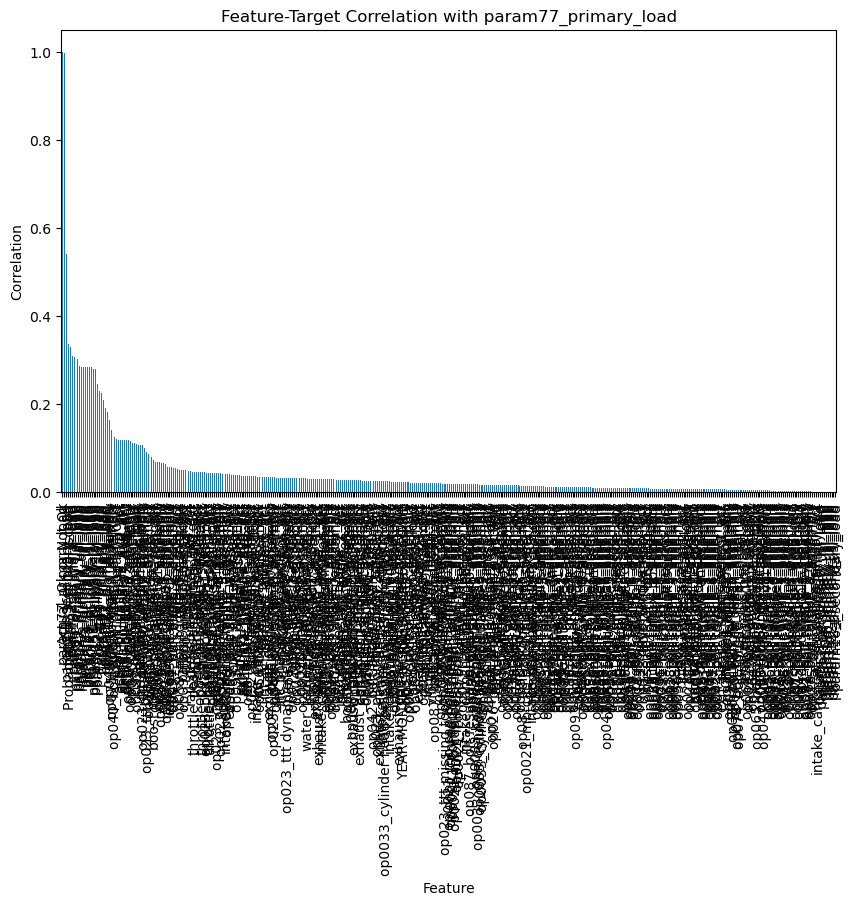

Highly correlated features (above 0.05) with param77_primary_load: ['Probability of  Not Ok -  score ', 'Actual- Ok or Not Ok', 'boost_temperature_sensor_avg_act', 'actual_oil_gallery1_avg_act', 'actual_oil_gallery2_avg_act', 'actual_oil_gallery3_avg_act', 'actual_oil_gallery4_avg_act', 'actual_oil_gallery_avg_act', 'torque2_avg_act', 'turbo_acceleration_max_act', 'turbo_acceleration_min_act', 'leak_test_reading_g2_d22_g20', 'param2_primary_load', 'param2_primary_lsl_load', 'param2_primary_usl_load', 'param9_primary_load', 'param21_primary_load', 'param21_primary_lsl_load', 'param21_primary_usl_load', 'param27_primary_load', 'param27_primary_lsl_load', 'param27_primary_usl_load', 'param33_primary_load', 'param51_secondary_load', 'param63_primary_load', 'param63_primary_lsl_load', 'param63_primary_usl_load', 'param71_primary_lsl_load', 'param77_primary_load', 'param85_secondary_load', 'param104_primary_load', 'param110_primary_load', 'param122_primary_load', 'param134_primary_load', 'pa

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

target_variable = 'param77_primary_load'

# Calculate Pearson's correlation matrix with the target variable
correlation_matrix = df_normalized.corrwith(df[target_variable])

# Plot a bar plot for feature-target correlation
plt.figure(figsize=(10, 6))
correlation_matrix.abs().sort_values(ascending=False).plot(kind='bar')
plt.title(f'Feature-Target Correlation with {target_variable}')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.show()

threshold = 0.05  

high_corr_features = correlation_matrix[correlation_matrix.abs() > threshold].index.tolist()

# Display the highly correlated features with the target variable
print(f"Highly correlated features (above {threshold}) with {target_variable}: {high_corr_features}")

# Create a new DataFrame with selected features
df_filtered = df[high_corr_features]

# Display the DataFrame after feature selection



In [164]:
#using pearson's corelations
df_filtered.shape

(23129, 60)

In [130]:
print("Column Names:")
print(df_filtered.columns)

Column Names:
Index(['Probability of  Not Ok -  score ', 'Actual- Ok or Not Ok',
       'param2_primary_load', 'param2_primary_lsl_load',
       'param2_primary_usl_load', 'param9_primary_load',
       'param21_primary_load', 'param21_primary_lsl_load',
       'param21_primary_usl_load', 'param27_primary_lsl_load',
       'param27_primary_usl_load', 'param33_primary_load',
       'param51_secondary_load', 'param63_primary_lsl_load',
       'param63_primary_usl_load', 'param71_primary_lsl_load',
       'param77_primary_load', 'param134_primary_load',
       'param151_primary_lsl_load', 'param154_primary_lsl_load',
       'param166_primary_load', 'param167_primary_load'],
      dtype='object')


# Models under Pearson's

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df_filtered is your DataFrame
# Separate features and target variable
X = df_filtered.drop('param77_primary_load', axis=1)
y = df_filtered['param77_primary_load']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Confusion Matrix:
[[2021    1]
 [   4 2600]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2022
           1       1.00      1.00      1.00      2604

    accuracy                           1.00      4626
   macro avg       1.00      1.00      1.00      4626
weighted avg       1.00      1.00      1.00      4626



In [93]:
from sklearn.model_selection import cross_val_score

# Assuming rf_model is your trained RandomForestClassifier
# X and y are your features and target variable

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Print the average cross-validation accuracy
print("Average Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.99913532 0.99956766 1.         0.9971898  0.99697297]
Average Accuracy: 0.9985731505824891


In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df_filtered is your DataFrame
# Separate features and target variable
X = df_filtered.drop('param77_primary_load', axis=1)
y = df_filtered['param77_primary_load']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Decision Tree Accuracy: {accuracy:.2f}")
print("Decision Tree Confusion Matrix:")
print(conf_matrix)
print("Decision Tree Classification Report:")
print(class_report)


Decision Tree Accuracy: 1.00
Decision Tree Confusion Matrix:
[[2030    3]
 [   5 2588]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2033
           1       1.00      1.00      1.00      2593

    accuracy                           1.00      4626
   macro avg       1.00      1.00      1.00      4626
weighted avg       1.00      1.00      1.00      4626



In [131]:
from sklearn.model_selection import cross_val_score

# Assuming rf_model is your trained RandomForestClassifier
# X and y are your features and target variable

# Perform 5-fold cross-validation
cv_scores = cross_val_score(dt_model, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Print the average cross-validation accuracy
print("Average Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.99891915 0.99891915 0.99935149 0.99762214 0.99805405]
Average Accuracy: 0.9985731973218355


In [96]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df_filtered is your DataFrame
# Separate features and target variable
X = df_filtered.drop('param77_primary_load', axis=1)
y = df_filtered['param77_primary_load']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Gradient Boosting Accuracy: {accuracy:.2f}")
print("Gradient Boosting Confusion Matrix:")
print(conf_matrix)
print("Gradient Boosting Classification Report:")
print(class_report)


Gradient Boosting Accuracy: 1.00
Gradient Boosting Confusion Matrix:
[[2030    3]
 [   0 2593]]
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2033
           1       1.00      1.00      1.00      2593

    accuracy                           1.00      4626
   macro avg       1.00      1.00      1.00      4626
weighted avg       1.00      1.00      1.00      4626



In [132]:
from sklearn.model_selection import cross_val_score

# Assuming rf_model is your trained RandomForestClassifier
# X and y are your features and target variable

# Perform 5-fold cross-validation
cv_scores = cross_val_score(gb_model, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Print the average cross-validation accuracy
print("Average Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.99913532 0.99891915 0.99935149 0.99827064 0.99935135]
Average Accuracy: 0.9990055923627909


In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df_filtered is your DataFrame
# Separate features and target variable
X = df_filtered.drop('param77_primary_load', axis=1)
y = df_filtered['param77_primary_load']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Logistic Regression Confusion Matrix:")
print(conf_matrix)
print("Logistic Regression Classification Report:")
print(class_report)


Logistic Regression Accuracy: 0.99
Logistic Regression Confusion Matrix:
[[1988   45]
 [  15 2578]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2033
           1       0.98      0.99      0.99      2593

    accuracy                           0.99      4626
   macro avg       0.99      0.99      0.99      4626
weighted avg       0.99      0.99      0.99      4626



C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [133]:
from sklearn.model_selection import cross_val_score

# Assuming rf_model is your trained RandomForestClassifier
# X and y are your features and target variable

# Perform 5-fold cross-validation
cv_scores = cross_val_score(logistic_model, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Print the average cross-validation accuracy
print("Average Accuracy:", cv_scores.mean())

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Cross-Validation Scores: [0.95049719 0.99481193 0.99286641 0.97924773 0.87718919]
Average Accuracy: 0.9589224898049802


C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Select K Best

In [149]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split

# Assuming df_filtered is your original DataFrame
# Separate features and target variable
X = df_normalized.drop('param77_primary_load', axis=1)
y = df_normalized['param77_primary_load']

# Specify the number of features (k) you want to select
k = 20

# Initialize the SelectKBest object
selector = SelectKBest(score_func=mutual_info_classif, k=k)

# Fit the selector to the data and transform it
X_selected = selector.fit_transform(X, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_features = X.columns[selected_indices]

# Create a DataFrame with the selected features and target variable
df_filtered_kmean = pd.DataFrame(X_selected, columns=selected_features)
df_filtered_kmean['param77_primary_load'] = y.values

# Display the new DataFrame
print("DataFrame df_filtered_kmean:")
print(df_filtered_kmean.shape)


DataFrame df_filtered_kmean:
(20816, 21)


In [150]:
print("Column Names:")
print(df_filtered_kmean.columns)

Column Names:
Index(['Probability of  Not Ok -  score ', 'Actual- Ok or Not Ok',
       'param2_primary_load', 'param2_primary_usl_load', 'param9_primary_load',
       'param21_primary_load', 'param21_primary_lsl_load',
       'param21_primary_usl_load', 'param27_primary_load',
       'param27_primary_lsl_load', 'param33_primary_load',
       'param51_secondary_load', 'param57_primary_load',
       'param63_primary_usl_load', 'param85_secondary_load',
       'param87_secondary_load', 'param134_primary_load',
       'param159_primary_load', 'param166_primary_load',
       'param167_primary_load', 'param77_primary_load'],
      dtype='object')


# K mean's Models

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df_filtered is your DataFrame
# Separate features and target variable
X = df_filtered_kmean.drop('param77_primary_load', axis=1)
y = df_filtered_kmean['param77_primary_load']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Confusion Matrix:
[[1954    0]
 [   2 2208]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1954
           1       1.00      1.00      1.00      2210

    accuracy                           1.00      4164
   macro avg       1.00      1.00      1.00      4164
weighted avg       1.00      1.00      1.00      4164



In [153]:
from sklearn.model_selection import cross_val_score

# Assuming rf_model is your trained RandomForestClassifier
# X and y are your features and target variable

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Print the average cross-validation accuracy
print("Average Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.99903939 1.         0.99615662 0.99735767 0.99255345]
Average Accuracy: 0.9970214249634779


In [154]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df_filtered is your DataFrame
# Separate features and target variable
X = df_filtered_kmean.drop('param77_primary_load', axis=1)
y = df_filtered_kmean['param77_primary_load']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Decision Tree Accuracy: {accuracy:.2f}")
print("Decision Tree Confusion Matrix:")
print(conf_matrix)
print("Decision Tree Classification Report:")
print(class_report)


Decision Tree Accuracy: 1.00
Decision Tree Confusion Matrix:
[[1961    1]
 [   7 2195]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1962
           1       1.00      1.00      1.00      2202

    accuracy                           1.00      4164
   macro avg       1.00      1.00      1.00      4164
weighted avg       1.00      1.00      1.00      4164



In [155]:
from sklearn.model_selection import cross_val_score

# Assuming rf_model is your trained RandomForestClassifier
# X and y are your features and target variable

# Perform 5-fold cross-validation
cv_scores = cross_val_score(dt_model, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Print the average cross-validation accuracy
print("Average Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.99423631 0.99807831 0.99711746 0.99711746 0.90199375]
Average Accuracy: 0.9777086602781052


In [156]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df_filtered is your DataFrame
# Separate features and target variable
X = df_filtered_kmean.drop('param77_primary_load', axis=1)
y = df_filtered_kmean['param77_primary_load']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Gradient Boosting Accuracy: {accuracy:.2f}")
print("Gradient Boosting Confusion Matrix:")
print(conf_matrix)
print("Gradient Boosting Classification Report:")
print(class_report)


Gradient Boosting Accuracy: 1.00
Gradient Boosting Confusion Matrix:
[[1961    1]
 [   1 2201]]
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1962
           1       1.00      1.00      1.00      2202

    accuracy                           1.00      4164
   macro avg       1.00      1.00      1.00      4164
weighted avg       1.00      1.00      1.00      4164



In [157]:
from sklearn.model_selection import cross_val_score

# Assuming rf_model is your trained RandomForestClassifier
# X and y are your features and target variable

# Perform 5-fold cross-validation
cv_scores = cross_val_score(gb_model, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Print the average cross-validation accuracy
print("Average Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.99903939 1.         0.99975979 0.99735767 0.98558732]
Average Accuracy: 0.9963488330826229


In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df_filtered is your DataFrame
# Separate features and target variable
X = df_filtered_kmean.drop('param77_primary_load', axis=1)
y = df_filtered_kmean['param77_primary_load']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Logistic Regression Confusion Matrix:")
print(conf_matrix)
print("Logistic Regression Classification Report:")
print(class_report)


Logistic Regression Accuracy: 0.88
Logistic Regression Confusion Matrix:
[[1827  135]
 [ 369 1833]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1962
           1       0.93      0.83      0.88      2202

    accuracy                           0.88      4164
   macro avg       0.88      0.88      0.88      4164
weighted avg       0.88      0.88      0.88      4164



C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [159]:
from sklearn.model_selection import cross_val_score

# Assuming rf_model is your trained RandomForestClassifier
# X and y are your features and target variable

# Perform 5-fold cross-validation
cv_scores = cross_val_score(logistic_model, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Print the average cross-validation accuracy
print("Average Accuracy:", cv_scores.mean())


C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Cross-Validation Scores: [0.88808838 0.86211866 0.71414845 0.84338218 0.63439827]
Average Accuracy: 0.7884271876830862


C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# RECURSIVE FEATURE ELIMINATION

In [165]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming df_filtered is your DataFrame
# Separate features and target variable
X = df_filtered.drop('param77_primary_load', axis=1)
y = df_filtered['param77_primary_load']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize RFE with Random Forest classifier
rfe = RFE(estimator=rf_classifier, n_features_to_select=20)

# Fit RFE on the entire dataset
X_rfe = rfe.fit_transform(X, y)

# Get the selected feature indices
selected_indices = rfe.support_

# Get the selected feature names
selected_features = X.columns[selected_indices]

# Create a DataFrame with the selected features and target variable for the entire dataset
df_filtered_rfe = pd.DataFrame(X_rfe, columns=selected_features)
df_filtered_rfe['param77_primary_load'] = y.values

# Display the new DataFrame
print("DataFrame df_filtered_rfe:")
print(df_filtered_rfe.head())


DataFrame df_filtered_rfe:
   Probability of  Not Ok -  score   Actual- Ok or Not Ok  \
0                          0.597073                   0.0   
1                          0.602441                   0.0   
2                          0.654298                   0.0   
3                          0.666948                   0.0   
4                          0.656042                   0.0   

   param2_primary_load  param9_primary_load  param21_primary_load  \
0                302.5                17.90                 39.85   
1                313.4                18.38                 44.32   
2                309.8                18.56                 59.92   
3                311.9                18.50                 63.03   
4                198.3                15.08                 35.77   

   param21_primary_usl_load  param27_primary_load  param33_primary_load  \
0                      80.0                 282.7                1103.8   
1                      80.0              

In [166]:
df_filtered_rfe.shape

(23129, 21)

In [167]:
print("Column Names:")
print(df_filtered_rfe.columns)

Column Names:
Index(['Probability of  Not Ok -  score ', 'Actual- Ok or Not Ok',
       'param2_primary_load', 'param9_primary_load', 'param21_primary_load',
       'param21_primary_usl_load', 'param27_primary_load',
       'param33_primary_load', 'param51_secondary_load',
       'param63_primary_usl_load', 'param71_primary_lsl_load',
       'param85_secondary_load', 'param110_primary_load',
       'param122_primary_load', 'param134_primary_load',
       'param165_primary_load', 'op040_bolt angle4_assembly',
       'op063_bolt torque_14_assembly', 'op075_bolt angle_9_assembly',
       'op040_bolt angle__mean_assembly', 'param77_primary_load'],
      dtype='object')


In [168]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df_filtered is your DataFrame
# Separate features and target variable
X = df_filtered_rfe.drop('param77_primary_load', axis=1)
y = df_filtered_rfe['param77_primary_load']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Initialize the RandomForestClassifier
rf_model_rfe = RandomForestClassifier(n_estimators=10, random_state=42)

# Train the model
rf_model_rfe.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model_rfe.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Confusion Matrix:
[[2021    1]
 [   2 2602]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2022
           1       1.00      1.00      1.00      2604

    accuracy                           1.00      4626
   macro avg       1.00      1.00      1.00      4626
weighted avg       1.00      1.00      1.00      4626



In [169]:
# Get the indices where predictions were incorrect
incorrect_indices = y_test[y_test != y_pred].index

# Create a DataFrame with actual and predicted labels for the test set
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the records where predictions were incorrect
incorrect_records = df_results.loc[incorrect_indices]
print("Incorrectly Predicted Records:")
print(incorrect_records)

Incorrectly Predicted Records:
       Actual  Predicted
1195        1          0
6288        1          0
18374       0          1


In [170]:
from sklearn.model_selection import cross_val_score

# Assuming rf_model is your trained RandomForestClassifier
# X and y are your features and target variable

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Print the average cross-validation accuracy
print("Average Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.99913532 1.         0.99913532 0.9971898  0.99891892]
Average Accuracy: 0.9988758719809304


In [171]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df_filtered is your DataFrame
# Separate features and target variable
X = df_filtered_rfe.drop('param77_primary_load', axis=1)
y = df_filtered_rfe['param77_primary_load']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
dt_model_rfe = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model_rfe.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model_rfe.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Decision Tree Accuracy: {accuracy:.2f}")
print("Decision Tree Confusion Matrix:")
print(conf_matrix)
print("Decision Tree Classification Report:")
print(class_report)


Decision Tree Accuracy: 1.00
Decision Tree Confusion Matrix:
[[2030    3]
 [   0 2593]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2033
           1       1.00      1.00      1.00      2593

    accuracy                           1.00      4626
   macro avg       1.00      1.00      1.00      4626
weighted avg       1.00      1.00      1.00      4626



In [172]:
from sklearn.model_selection import cross_val_score

# Assuming rf_model is your trained RandomForestClassifier
# X and y are your features and target variable

# Perform 5-fold cross-validation
cv_scores = cross_val_score(dt_model_rfe, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Print the average cross-validation accuracy
print("Average Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.9971898  0.99935149 0.99870298 0.9971898  0.88994595]
Average Accuracy: 0.9764760028511


In [173]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df_filtered is your DataFrame
# Separate features and target variable
X = df_filtered_rfe.drop('param77_primary_load', axis=1)
y = df_filtered_rfe['param77_primary_load']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Gradient Boosting Accuracy: {accuracy:.2f}")
print("Gradient Boosting Confusion Matrix:")
print(conf_matrix)
print("Gradient Boosting Classification Report:")
print(class_report)


Gradient Boosting Accuracy: 1.00
Gradient Boosting Confusion Matrix:
[[2030    3]
 [   0 2593]]
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2033
           1       1.00      1.00      1.00      2593

    accuracy                           1.00      4626
   macro avg       1.00      1.00      1.00      4626
weighted avg       1.00      1.00      1.00      4626



In [174]:
from sklearn.model_selection import cross_val_score

# Assuming rf_model is your trained RandomForestClassifier
# X and y are your features and target variable

# Perform 5-fold cross-validation
cv_scores = cross_val_score(gb_model, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Print the average cross-validation accuracy
print("Average Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.99913532 1.         1.         0.9971898  0.992     ]
Average Accuracy: 0.9976650237786424


In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df_filtered is your DataFrame
# Separate features and target variable
X = df_filtered_rfe.drop('param77_primary_load', axis=1)
y = df_filtered_rfe['param77_primary_load']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Logistic Regression Confusion Matrix:")
print(conf_matrix)
print("Logistic Regression Classification Report:")
print(class_report)


Logistic Regression Accuracy: 0.88
Logistic Regression Confusion Matrix:
[[1797  236]
 [ 317 2276]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      2033
           1       0.91      0.88      0.89      2593

    accuracy                           0.88      4626
   macro avg       0.88      0.88      0.88      4626
weighted avg       0.88      0.88      0.88      4626



C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [177]:
from sklearn.model_selection import cross_val_score

# Assuming rf_model is your trained RandomForestClassifier
# X and y are your features and target variable

# Perform 5-fold cross-validation
cv_scores = cross_val_score(logistic_model, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Print the average cross-validation accuracy
print("Average Accuracy:", cv_scores.mean())


C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Cross-Validation Scores: [0.88694336 0.82403805 0.80652832 0.70103761 0.62637838]
Average Accuracy: 0.7689851438987626


C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [122]:
# pip install boruta


In [123]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming df_filtered is your DataFrame
# Separate features and target variable
X = df_filtered.drop('param77_primary_load', axis=1)
y = df_filtered['param77_primary_load']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Concatenate the training and test sets
X_combined = pd.concat([X_train, X_test], axis=0)
y_combined = pd.concat([y_train, y_test], axis=0)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

# Initialize Boruta with Random Forest classifier
boruta_selector = BorutaPy(rf_classifier, n_estimators='auto', random_state=42)

# Fit Boruta on the combined data
boruta_selector.fit(X_combined.values, y_combined.values)

# Get the selected feature indices
selected_indices = boruta_selector.support_

# Get the selected feature names
selected_features = X_combined.columns[selected_indices]

# Create a DataFrame with the selected features and target variable
df_filtered_boruta = pd.DataFrame(X_combined[selected_features].values, columns=selected_features)
df_filtered_boruta['param77_primary_load'] = y_combined.values

# Display the new DataFrame
print("DataFrame df_filtered_boruta:")
print(df_filtered_boruta.head())


DataFrame df_filtered_boruta:
   Probability of  Not Ok -  score   Actual- Ok or Not Ok  \
0                          0.702104                   1.0   
1                          0.679265                   1.0   
2                          0.645645                   0.0   
3                          0.536634                   0.0   
4                          0.651083                   0.0   

   param2_primary_load  param2_primary_lsl_load  param2_primary_usl_load  \
0                314.3                    300.0                    340.0   
1                316.8                    300.0                    340.0   
2                337.0                    300.0                    340.0   
3                318.4                    300.0                    340.0   
4                317.9                    300.0                    340.0   

   param9_primary_load  param21_primary_load  param21_primary_usl_load  \
0                18.51                 75.70                      75.0  

In [124]:
df_filtered_boruta.shape

(23129, 18)

In [178]:
print("Column Names:")
print(df_filtered_boruta.columns)

Column Names:
Index(['Probability of  Not Ok -  score ', 'Actual- Ok or Not Ok',
       'param2_primary_load', 'param2_primary_lsl_load',
       'param2_primary_usl_load', 'param9_primary_load',
       'param21_primary_load', 'param21_primary_usl_load',
       'param27_primary_lsl_load', 'param27_primary_usl_load',
       'param33_primary_load', 'param51_secondary_load',
       'param63_primary_lsl_load', 'param63_primary_usl_load',
       'param71_primary_lsl_load', 'param134_primary_load',
       'param166_primary_load', 'param77_primary_load'],
      dtype='object')


In [125]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df_filtered is your DataFrame
# Separate features and target variable
X = df_filtered_boruta.drop('param77_primary_load', axis=1)
y = df_filtered_boruta['param77_primary_load']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Confusion Matrix:
[[2000    0]
 [   3 2623]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2626

    accuracy                           1.00      4626
   macro avg       1.00      1.00      1.00      4626
weighted avg       1.00      1.00      1.00      4626



In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df_filtered is your DataFrame
# Separate features and target variable
X = df_filtered_boruta.drop('param77_primary_load', axis=1)
y = df_filtered_boruta['param77_primary_load']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Decision Tree Accuracy: {accuracy:.2f}")
print("Decision Tree Confusion Matrix:")
print(conf_matrix)
print("Decision Tree Classification Report:")
print(class_report)


Decision Tree Accuracy: 1.00
Decision Tree Confusion Matrix:
[[2023    4]
 [   3 2596]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2027
           1       1.00      1.00      1.00      2599

    accuracy                           1.00      4626
   macro avg       1.00      1.00      1.00      4626
weighted avg       1.00      1.00      1.00      4626



In [127]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df_filtered is your DataFrame
# Separate features and target variable
X = df_filtered_boruta.drop('param77_primary_load', axis=1)
y = df_filtered_boruta['param77_primary_load']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Support Vector Machine (SVM) classifier
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"SVM Accuracy: {accuracy:.2f}")
print("SVM Confusion Matrix:")
print(conf_matrix)
print("SVM Classification Report:")
print(class_report)


SVM Accuracy: 0.87
SVM Confusion Matrix:
[[2011   16]
 [ 568 2031]]
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      2027
           1       0.99      0.78      0.87      2599

    accuracy                           0.87      4626
   macro avg       0.89      0.89      0.87      4626
weighted avg       0.90      0.87      0.87      4626



In [128]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df_filtered is your DataFrame
# Separate features and target variable
X = df_filtered_boruta.drop('param77_primary_load', axis=1)
y = df_filtered_boruta['param77_primary_load']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Gradient Boosting Accuracy: {accuracy:.2f}")
print("Gradient Boosting Confusion Matrix:")
print(conf_matrix)
print("Gradient Boosting Classification Report:")
print(class_report)


Gradient Boosting Accuracy: 1.00
Gradient Boosting Confusion Matrix:
[[2023    4]
 [   1 2598]]
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2027
           1       1.00      1.00      1.00      2599

    accuracy                           1.00      4626
   macro avg       1.00      1.00      1.00      4626
weighted avg       1.00      1.00      1.00      4626



In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df_filtered is your DataFrame
# Separate features and target variable
X = df_filtered_boruta.drop('param77_primary_load', axis=1)
y = df_filtered_boruta['param77_primary_load']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Logistic Regression Confusion Matrix:")
print(conf_matrix)
print("Logistic Regression Classification Report:")
print(class_report)


Logistic Regression Accuracy: 0.99
Logistic Regression Confusion Matrix:
[[2006   21]
 [   6 2593]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2027
           1       0.99      1.00      0.99      2599

    accuracy                           0.99      4626
   macro avg       0.99      0.99      0.99      4626
weighted avg       0.99      0.99      0.99      4626



C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
